<a href="https://colab.research.google.com/github/freezer2019/Analytics/blob/main/Analysedonnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import datetime
from numpy import log as ln
from sklearn.model_selection import train_test_split
from google.colab import drive 
import plotly.graph_objects as go
import plotly.express as px

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.7 MB/s 
     |████████████████████████████████| 6.3 MB 35.0 MB/s 
     |████████████████████████████████| 16.7 MB 474 kB/s 


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
data = pd.read_excel('Sent database.xlsx')

In [5]:
data.head()

,Régions,Population 2018,Répartion des pauvres 2018,Surface,Manioc,Maraîcher,Aquaculture,Mangue,Hévéa,Ananas,...,Riz,Maïs,Viande,Poisson,Karité,Legumes,Porcin,BAD,World Bank,Total financement
0,Yamoussoukro,392489,98776,3496.0,2,1,1,0,0,0,...,1,1,0,1,0,1,1,3.387184e+10,1.146285e+10,4.533469e+10
1,Bélier,382767,197552,6809.0,1,0,0,1,1,1,...,1,1,0,1,0,1,1,3.794686e+10,5.744211e+09,4.369107e+10
2,Bagoué,414688,197552,10668.0,0,0,0,2,1,1,...,1,1,1,1,1,0,0,1.307488e+10,2.575156e+10,3.882644e+10
3,Poro,843150,493879,13400.0,0,0,0,2,1,1,...,1,1,1,1,1,0,0,1.307488e+10,2.575156e+10,3.882644e+10
4,Tchologo,516538,395103,17728.0,0,0,0,2,1,1,...,1,1,1,1,1,0,0,1.307488e+10,2.575156e+10,3.882644e+10


In [6]:
data[['Total financement', "Population 2018"]].describe()

,Total financement,Population 2018
count,3.100000e+01,3.100000e+01
mean,2.130322e+10,7.842898e+05
std,1.170699e+10,9.650028e+05
min,4.075025e+09,1.064240e+05
25%,1.553788e+10,3.859945e+05
50%,2.093148e+10,5.165380e+05
75%,2.551717e+10,9.321755e+05
max,4.533469e+10,5.640461e+06


In [7]:
data['Population 2018'] = data['Population 2018'].div(1000000).round(4)
data['Répartion des pauvres 2018'] = data['Répartion des pauvres 2018'].div(1000000).round(4)
data['Surface'] = data['Surface'].div(1000).round(1)
data['Total financement'] = data['Total financement'].div(1000000000).round(4)
data['BAD'] = data['BAD'].div(1000000000).round(4)
data['World Bank'] = data['World Bank'].div(1000000000).round(4)

In [8]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [9]:
missing_data(data)

,Régions,Population 2018,Répartion des pauvres 2018,Surface,Manioc,Maraîcher,Aquaculture,Mangue,Hévéa,Ananas,...,Riz,Maïs,Viande,Poisson,Karité,Legumes,Porcin,BAD,World Bank,Total financement
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,float64,float64,float64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


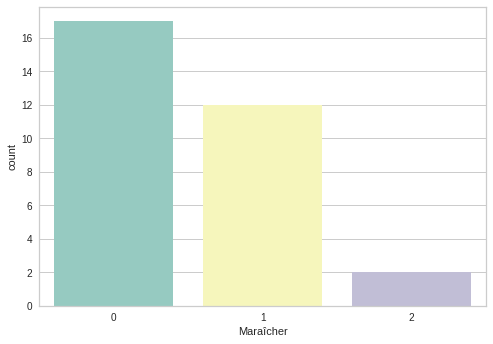

In [10]:
sns.countplot(data['Maraîcher'], palette='Set3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


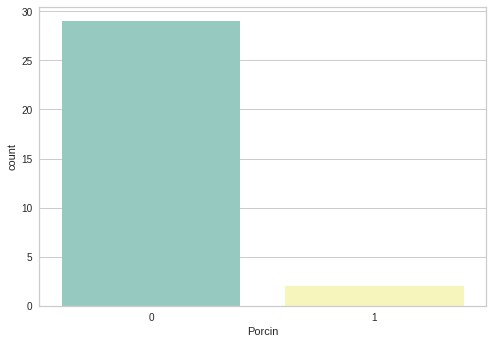

In [11]:
sns.countplot(data['Porcin'], palette='Set3')

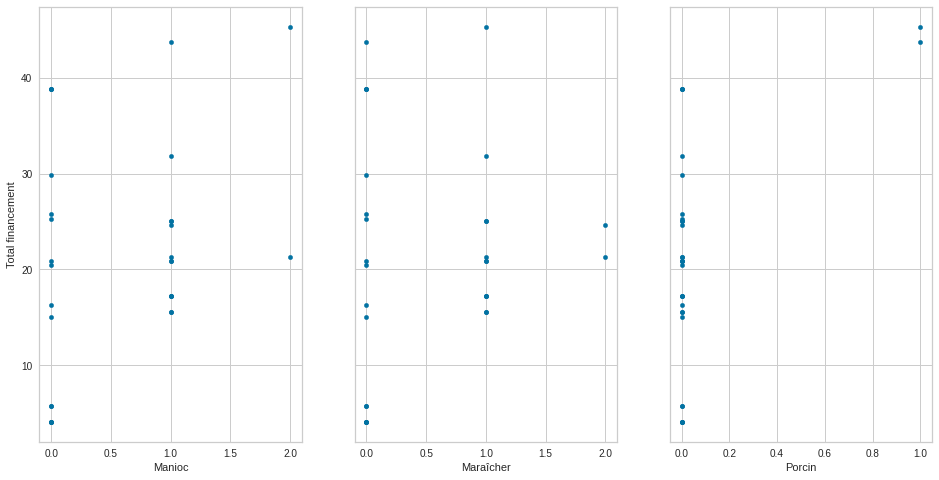

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Manioc', y='Total financement', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Maraîcher', y='Total financement', ax=axs[1])
data.plot(kind='scatter', x='Porcin', y='Total financement', ax=axs[2])

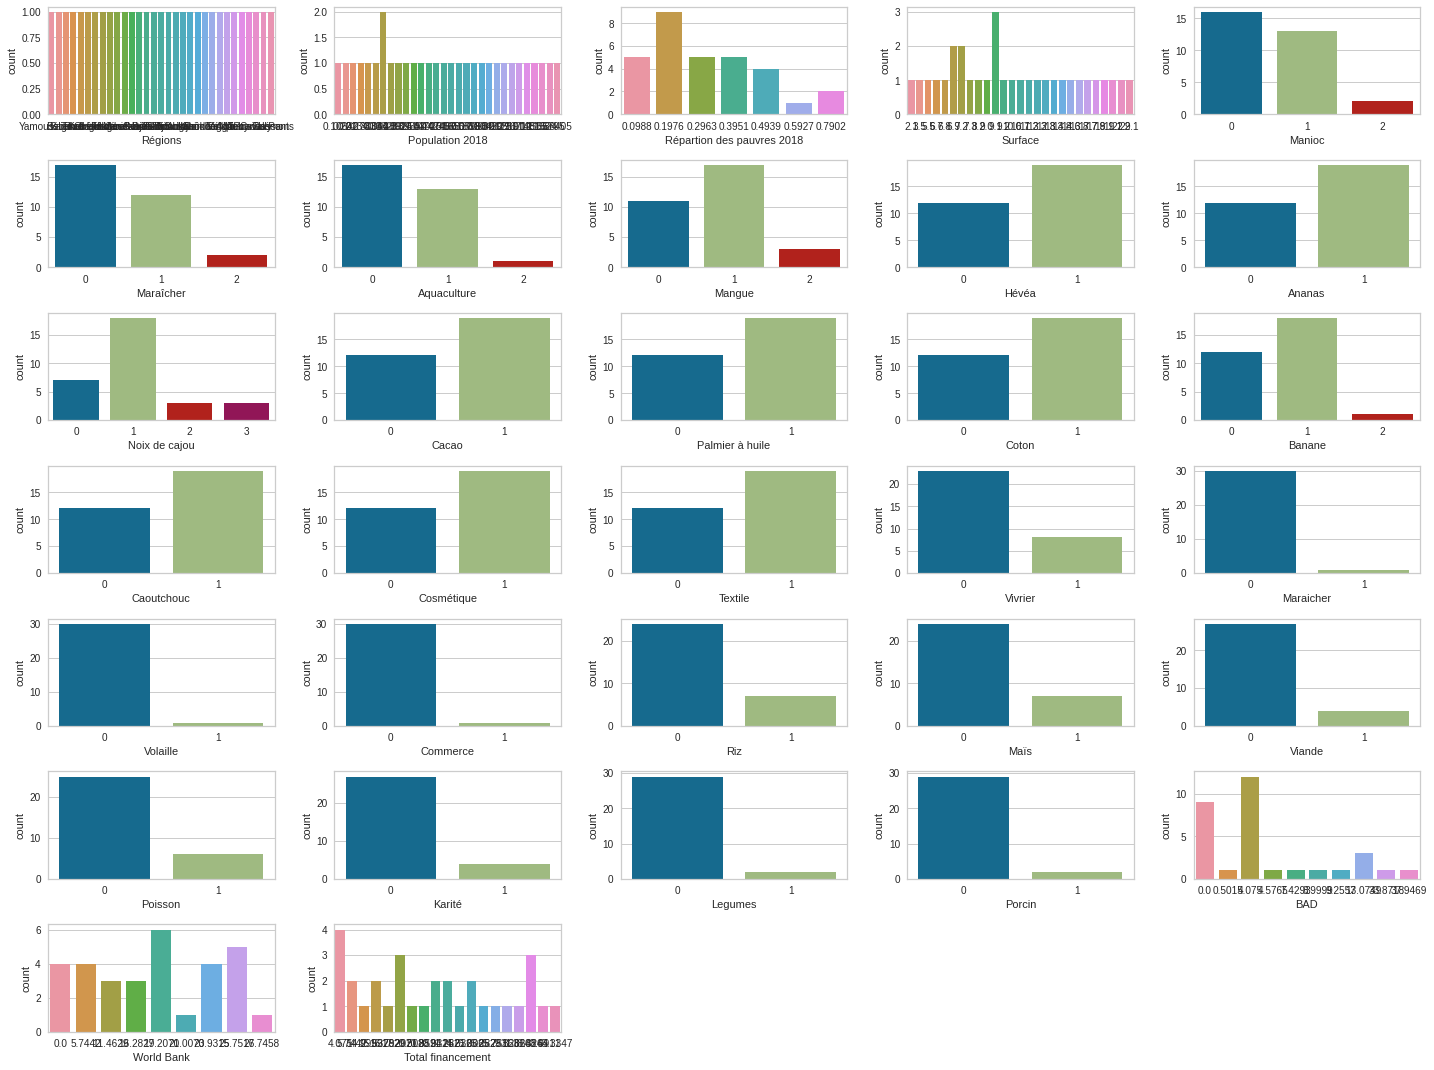

In [13]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(data):
    plt.subplot(7, 5,index+1)
    sns.countplot(x=col, data=data.dropna())
fig.tight_layout(pad=1.0)

In [14]:
data1 = data.drop(labels=["BAD", "World Bank"], axis=1)
data1.corr()['Total financement'].sort_values(ascending=False)

Total financement             1.000000
Poisson                       0.730018
Maïs                          0.712131
Riz                           0.712131
Vivrier                       0.640115
Noix de cajou                 0.595257
Porcin                        0.529249
Legumes                       0.529249
Mangue                        0.472731
Karité                        0.472486
Viande                        0.472486
Manioc                        0.306146
Cosmétique                    0.277022
Textile                       0.277022
Caoutchouc                    0.277022
Coton                         0.277022
Palmier à huile               0.277022
Cacao                         0.277022
Ananas                        0.277022
Hévéa                         0.277022
Banane                        0.266325
Maraîcher                     0.109210
Aquaculture                   0.103244
Surface                       0.014500
Répartion des pauvres 2018   -0.047201
Population 2018          

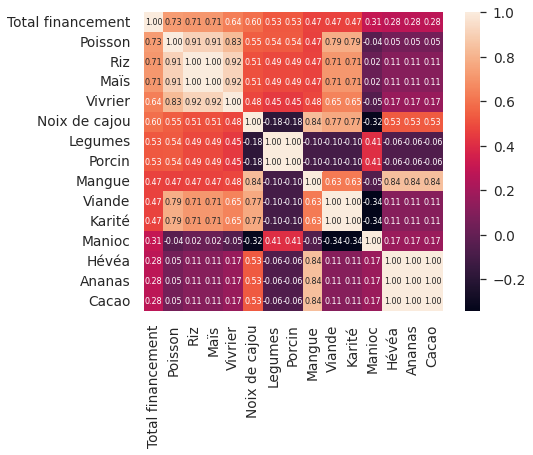

In [28]:
corrmat = data1.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Total financement')['Total financement'].index
cm = np.corrcoef(data1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


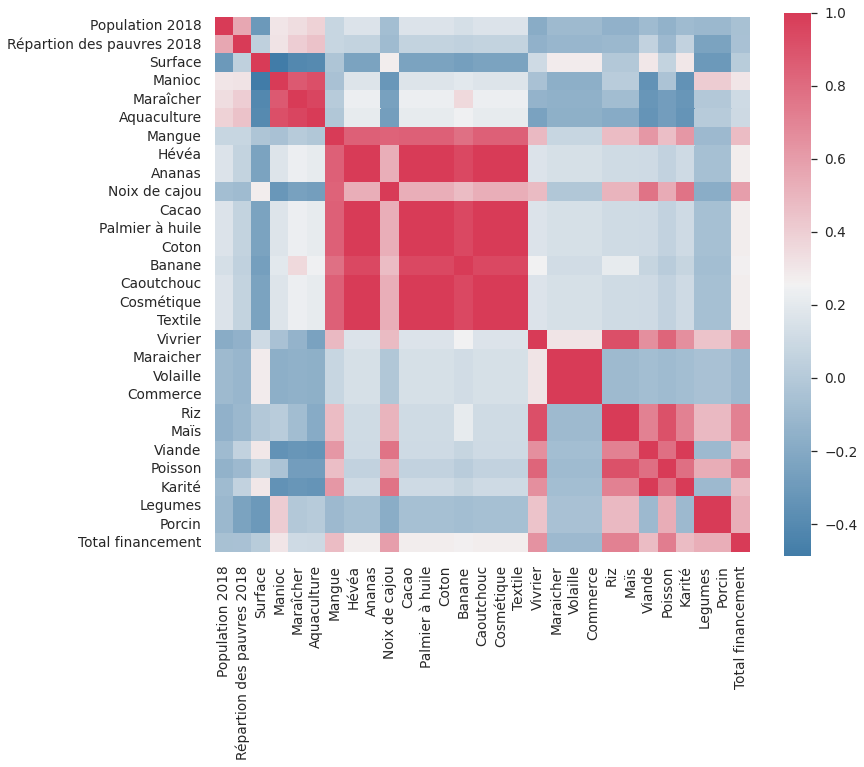

In [29]:
f, ax = plt.subplots(figsize=(12, 10))
corr = data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,6,as_cmap=True),
            square=True, ax=ax)

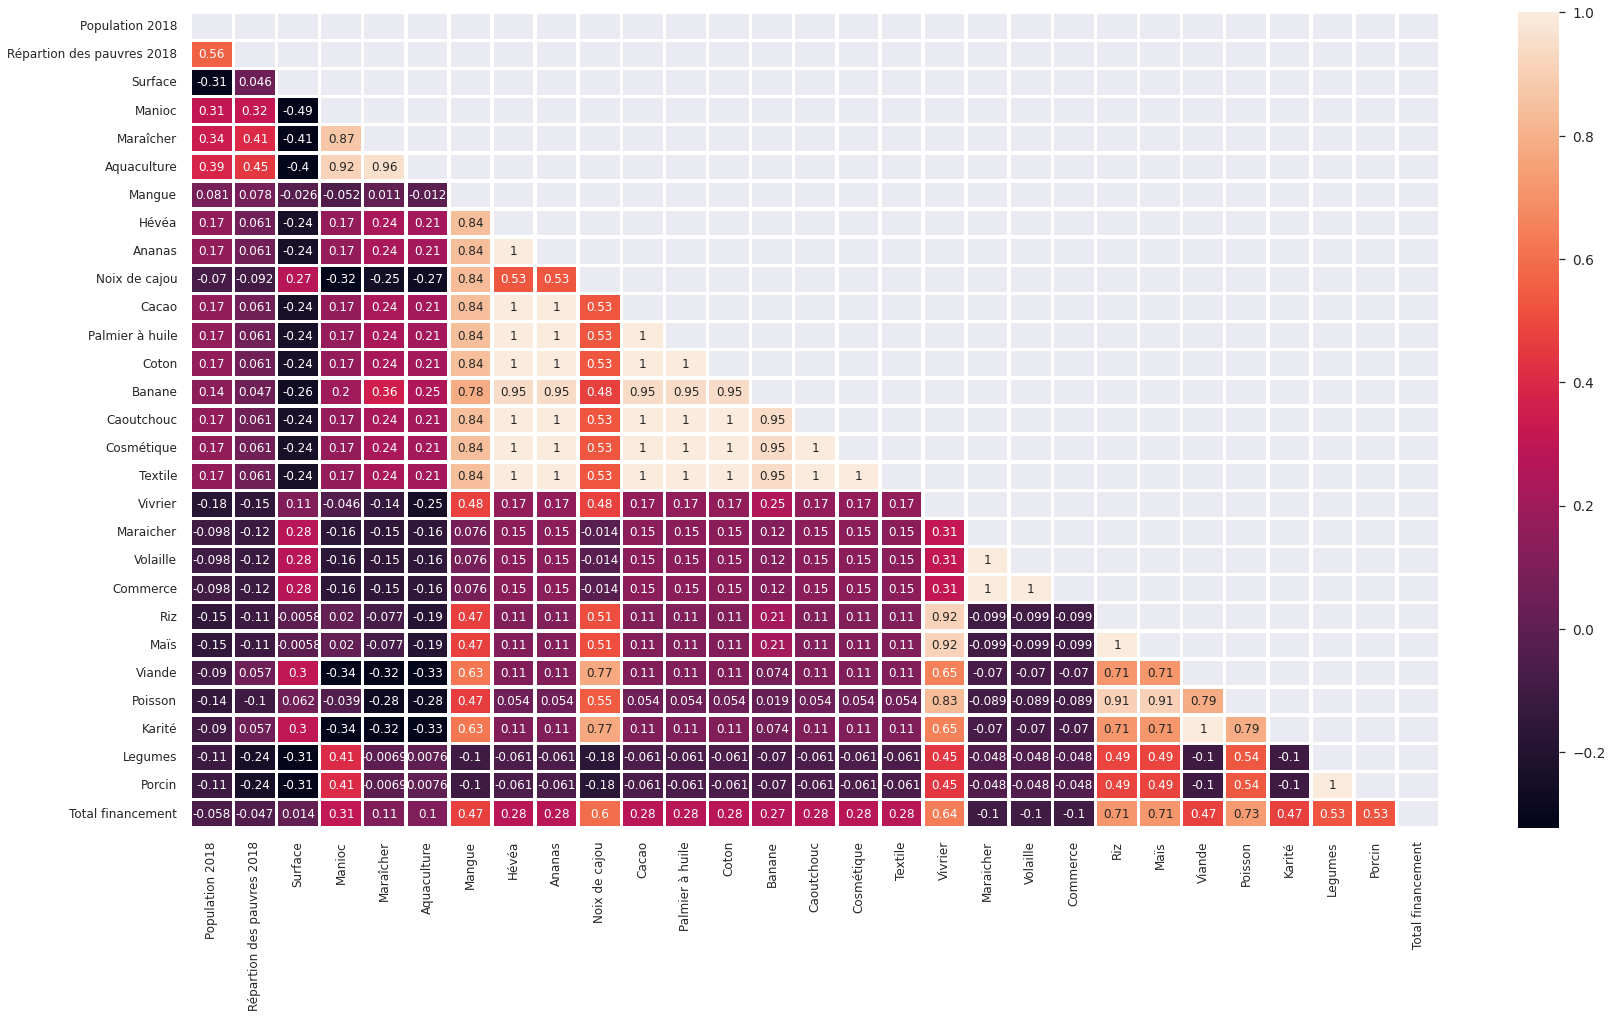

In [31]:
mask = np.zeros_like(data1.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True


plt.figure(figsize = (28, 15))
sns.heatmap(data1.corr(), mask = mask, annot = True, annot_kws = {"size": 12}, robust = True, linewidths = 2.5)
sns.set_style(style = "darkgrid")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


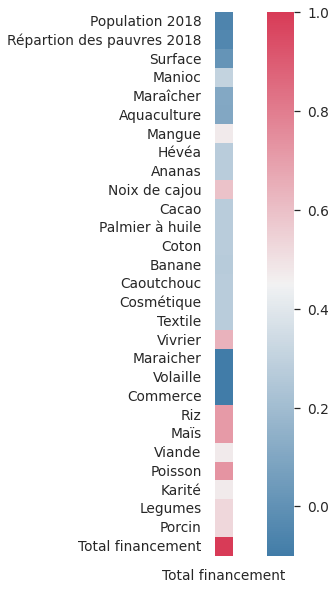

In [47]:
f, ax = plt.subplots(figsize=(12, 10))
corr2 = corr.drop(labels = ["Répartion des pauvres 2018", "Maraicher", "Volaille", "Maïs", "Viande", "Poisson", "Porcin", "Commerce", "Riz", "Population 2018", "Surface", "Manioc", "Maraîcher", "Legumes", "Karité", "Aquaculture",
                            "Mangue", "Hévéa", "Ananas", "Noix de cajou", "Cacao", "Palmier à huile", "Coton", "Banane",
                            "Caoutchouc", "Cosmétique", "Textile", "Vivrier"], axis=1)
sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(240,6,as_cmap=True),
            square=True, ax=ax)

In [33]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
data2 = data1.drop(labels=["Total financement", "Régions"], axis=1)

In [25]:
results1 = smf.ols(formula='data1["Total financement"] ~ data1.drop(labels=["Total financement", "Régions"], axis=1)', data=data).fit()

In [27]:
print(results1.summary())

                                OLS Regression Results                                
Dep. Variable:     data1["Total financement"]   R-squared:                       0.951
Model:                                    OLS   Adj. R-squared:                  0.927
Method:                         Least Squares   F-statistic:                     38.87
Date:                        Wed, 21 Sep 2022   Prob (F-statistic):           6.57e-11
Time:                                20:08:15   Log-Likelihood:                -72.978
No. Observations:                          31   AIC:                             168.0
Df Residuals:                              20   BIC:                             183.7
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975

In [46]:
data1.drop(labels=["Total financement", "Régions"], axis=1).columns

Index(['Population 2018', 'Répartion des pauvres 2018', 'Surface', 'Manioc',
       'Maraîcher', 'Aquaculture', 'Mangue', 'Hévéa', 'Ananas',
       'Noix de cajou', 'Cacao', 'Palmier à huile', 'Coton', 'Banane',
       'Caoutchouc', 'Cosmétique', 'Textile', 'Vivrier', 'Maraicher',
       'Volaille', 'Commerce', 'Riz', 'Maïs', 'Viande', 'Poisson', 'Karité',
       'Legumes', 'Porcin'],
      dtype='object')

In [ ]:
results1.params

Intercept                                                          4.444030e+09
data1.drop(labels=["Total financement", "Régions"], axis=1)[0]    -1.837459e+03
data1.drop(labels=["Total financement", "Régions"], axis=1)[1]     1.613007e+04
data1.drop(labels=["Total financement", "Régions"], axis=1)[2]    -5.433926e+09
data1.drop(labels=["Total financement", "Régions"], axis=1)[3]    -1.752127e+05
data1.drop(labels=["Total financement", "Régions"], axis=1)[4]     8.188901e+09
data1.drop(labels=["Total financement", "Régions"], axis=1)[5]    -4.447278e+08
data1.drop(labels=["Total financement", "Régions"], axis=1)[6]    -4.133407e+08
data1.drop(labels=["Total financement", "Régions"], axis=1)[7]    -7.344941e+09
data1.drop(labels=["Total financement", "Régions"], axis=1)[8]    -5.660959e+08
data1.drop(labels=["Total financement", "Régions"], axis=1)[9]    -5.660959e+08
data1.drop(labels=["Total financement", "Régions"], axis=1)[10]    1.961913e+10
data1.drop(labels=["Total financement", 

In [ ]:
data.corr()['BAD'].sort_values(ascending=False)

BAD                           1.000000
Porcin                        0.893897
Legumes                       0.893897
Poisson                       0.776424
Riz                           0.744925
Maïs                          0.744925
Vivrier                       0.737975
Total financement             0.682599
Karité                        0.259951
Viande                        0.259951
Manioc                        0.247329
Mangue                        0.124668
Noix de cajou                 0.091807
Commerce                      0.064822
Volaille                      0.064822
Maraicher                     0.064822
Banane                       -0.009370
taux de pauvreté             -0.014664
Cosmétique                   -0.020097
Textile                      -0.020097
Caoutchouc                   -0.020097
Coton                        -0.020097
Palmier à huile              -0.020097
Cacao                        -0.020097
Ananas                       -0.020097
Hévéa                    